IMPORTING ALL NECESSARY PACKAGES. MOST OF THEM ARE ALREADY IN THE ANACONDA DISTRIBUTION

In [2]:
import asyncio
import nest_asyncio
import aiohttp
from understat import Understat
import requests
import codecs
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.animation as animation

In [3]:
club="Borussia M.Gladbach"

In [4]:
with open('club_name.txt', 'w') as f:
    f.write(club)
    f.close

In [5]:
team_for_foto=""
if club == "RasenBallsport Leipzig":
    team_for_foto="RB Leipzig"
elif club == "FC Cologne":
    team_for_foto="FC Köln"
elif club== "Augsburg":
    team_for_foto="FC Augsburg"
elif club== "Borussia M.Gladbach":
    team_for_foto="Borussia Mönchengladbach"
else:
    team_for_foto=club
team_for_foto

'Union Berlin'

In [6]:
torneo="2025-2026"

In [7]:
foto_path=f'images/{team_for_foto}.png'

In [8]:
%run -i undesstatteams.py

Union Berlin
[
    {
        "id": "30227",
        "isResult": true,
        "side": "h",
        "h": {
            "id": "240",
            "title": "Union Berlin",
            "short_title": "UNI"
        },
        "a": {
            "id": "133",
            "title": "VfB Stuttgart",
            "short_title": "STU"
        },
        "goals": {
            "h": "2",
            "a": "1"
        },
        "xG": {
            "h": "0.529421",
            "a": "1.80147"
        },
        "datetime": "2025-08-23 13:30:00",
        "forecast": {
            "w": 0.10219946835882875,
            "d": 0.2145142219418066,
            "l": 0.6832863087288216
        },
        "result": "w"
    },
    {
        "id": "30240",
        "isResult": true,
        "side": "a",
        "h": {
            "id": "129",
            "title": "Borussia Dortmund",
            "short_title": "DOR"
        },
        "a": {
            "id": "240",
            "title": "Union Berlin",
            "sh

In [9]:
# Get csv from D://understatteams.py !!!!!
df_understat=pd.read_csv(f'{club}_seasons_shots.csv')

In [10]:
df_understat.head()

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
0,8,0.911,0.438,Andrej Ilic,Head,MissedShots,Union Berlin,VfB Stuttgart,Christopher Trimmel,0.021803
1,17,0.751,0.549,Ilyas Ansah,RightFoot,Goal,Union Berlin,VfB Stuttgart,NaN,0.019161
2,39,0.754,0.574,Robert Skov,LeftFoot,MissedShots,Union Berlin,VfB Stuttgart,NaN,0.032468
3,48,0.862,0.460,Ilyas Ansah,RightFoot,Goal,Union Berlin,VfB Stuttgart,Andrej Ilic,0.073251
4,55,0.851,0.442,Tom Rothe,LeftFoot,MissedShots,Union Berlin,VfB Stuttgart,Robert Skov,0.080010


In [11]:
own_goals_total=len(df_understat[df_understat['result']=='OwnGoal'])
own_goals_total

0

In [12]:
own_goals=df_understat[df_understat['result']=='OwnGoal']
own_goals['xG']=0.5
own_goals

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [13]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_league_players(
            "bundesliga",
            2025,
            team_title=club
        )
        squad=json.dumps(players, indent=4, ensure_ascii=False)
    with codecs.open(f'{club}_squad.json', "w", "utf-8") as jsonfile:
        jsonfile.write(squad)
        #json.dumps(jamal_json, indent=4)
        jsonfile.close() 

nest_asyncio.apply()
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

squad_df=pd.read_json(f'{club}_squad.json')

In [14]:
squad=squad_df['player_name'].unique()
squad

array(['Ilyas Ansah', 'Oliver Burke', 'Danilho Doekhi', 'Rani Khedira',
       'Tom Rothe', 'Janik Haberer', 'Frederik Rönnow', 'Woo-Yeong Jeong',
       'Andras Schafer', 'Robert Skov', 'Christopher Trimmel',
       'Alex Kral', 'Diogo Leite', 'Tim Skarke', 'Aljoscha Kemlein',
       'Josip Juranovic', 'Andrej Ilic', 'Leopold Querfeld',
       'Derrick Köhn'], dtype=object)

In [15]:
"Paul Nebel" in squad

False

In [16]:
own_goals_len=len(own_goals[~own_goals['player'].isin(squad)])
own_goals_len

0

In [17]:
ogf=own_goals[~own_goals['player'].isin(squad)]
ogf

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [18]:
own_goals_for=0
for player in own_goals['player']:
    if player not in squad:
        own_goals_for+=1
own_goals_for

0

In [19]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

#df_understat['result'].unique()

In [20]:
df_understat[df_understat['result']=='OwnGoal']

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [21]:
#pip install mplsoccer
#pip install highlight-text

In [22]:
from highlight_text import ax_text,fig_text
from mplsoccer import (VerticalPitch, Pitch)

WE WILL CHANGE SOME OF THE BASIC PARAMETERS USING THE rcParams method OF MPL

In [24]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Franklin Gothic Medium Cond'
mpl.rcParams['legend.fontsize'] = 12


In [25]:
#mpl.font_manager.FontManager.get_font_names(mpl)

In [26]:
import numpy as np
from PIL import Image
from urllib.request import urlopen
import os
from mplsoccer import add_image

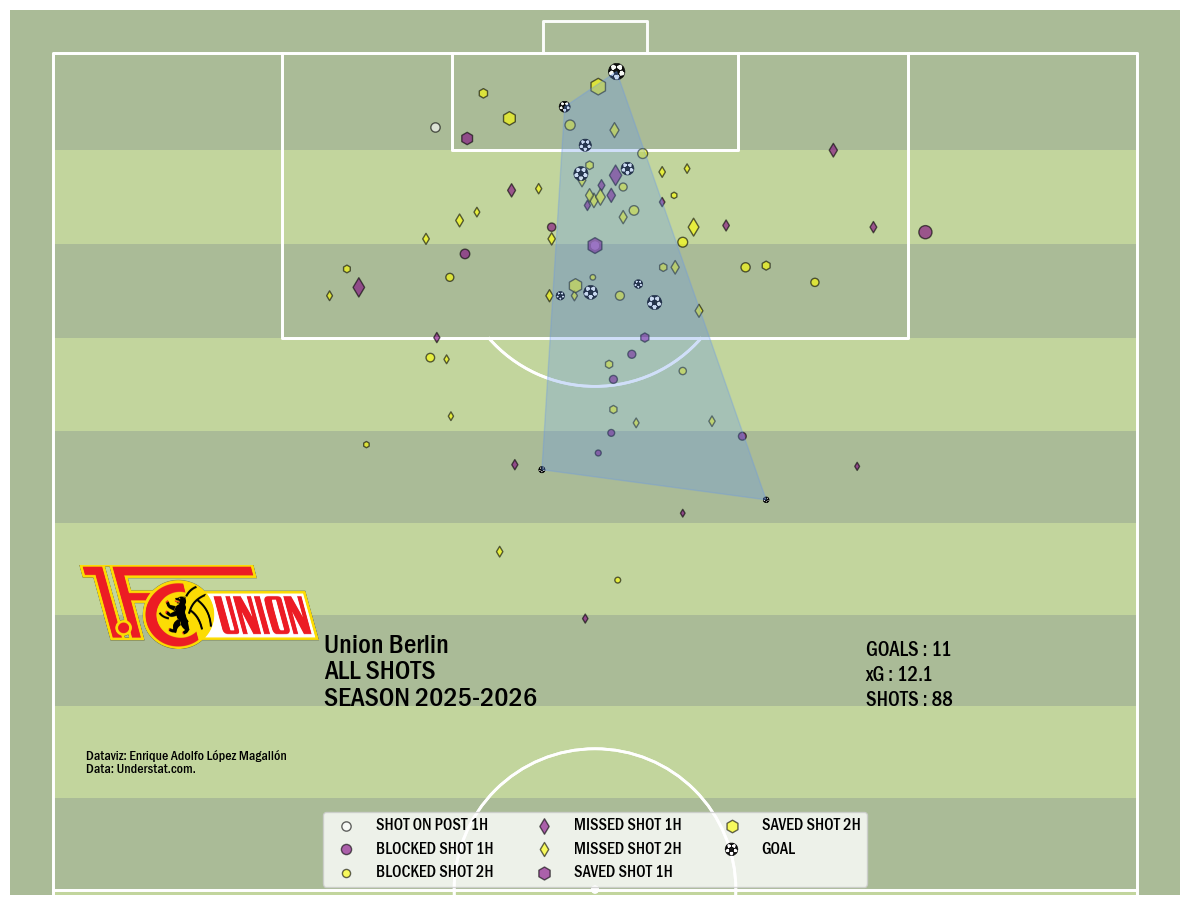

In [27]:
# SETTING UP THE AXES
#fig, ax = plt.subplots(figsize=(10,12))
#ax.axis('off')
#fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST TEAM
pitch = pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line 
    half=True,  # half of a pitch
    goal_type='box',
    goal_alpha=0.8, 
    pitch_type='opta',
    pitch_color='#aabb97',
    stripe=True,
    stripe_color='#c2d59d',
    line_color='white')  

fig, ax = pitch.draw(figsize=(12, 10))

#PLOTTING HTEAM
#df_fil = df_understat.loc[df_understat['HomeAway']=='h']
df_fil = df_understat
#df_hOG = df_fil[df_fil['HomeAway']=='a']
#df_fil = df_a
#df_hOG = df_fil[df_fil['HomeAway']=='h']
df_h1H = df_fil[df_fil['minute']<=45]
df_h2H = df_fil[df_fil['minute']>45]

#PLOTTING SHOTS TEAM 1 PER TYPE AND HALF.LABELS APPEAR ONLY IF VARIABLE IS FILLED


if "ShotOnPost" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='ShotOnPost']['X'],df_h1H[df_h1H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 1H")

if "ShotOnPost" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='ShotOnPost']['X'],df_h2H[df_h2H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 2H")
    
if "BlockedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='BlockedShot']['X'],df_h1H[df_h1H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="BLOCKED SHOT 1H")

if "BlockedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='BlockedShot']['X'],df_h2H[df_h2H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="BLOCKED SHOT 2H")

if "MissedShots" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='MissedShots']['X'],df_h1H[df_h1H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="MISSED SHOT 1H")

if "MissedShots" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='MissedShots']['X'],df_h2H[df_h2H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="MISSED SHOT 2H")
    
if "SavedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='SavedShot']['X'],df_h1H[df_h1H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="SAVED SHOT 1H")

if "SavedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='SavedShot']['X'],df_h2H[df_h2H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="SAVED SHOT 2H")
    


#NOW PLOTTING THE GOALS
if "Goal" in iter(df_fil['result']):
    pitch.scatter(df_fil[df_fil['result']=='Goal']['X'],df_fil[df_fil['result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['result']=='Goal']['xG'])*150, marker='football', alpha=0.9,
              edgecolors='black', facecolor='red', ax=ax, label="GOAL")
    hull=pitch.convexhull(df_fil[df_fil['result']=='Goal']['X'], df_fil[df_fil['result']=='Goal']['Y'])
    pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)

if "OwnGoal" in iter(ogf['result']):
    pitch.scatter(100-ogf[ogf['result']=='OwnGoal']['X']*100,100-ogf[df_fil['result']=='OwnGoal']['Y']*100, 
              s=np.sqrt(ogf[ogf['result']=='OwnGoal']['xG'])*150, marker='x', alpha=0.9,
              edgecolors='red', facecolor='red', ax=ax, label="OWN GOAL FOR")
    #hull=pitch.convexhull(df_fil[df_fil['result']=='OwnGoal']['X'], df_fil[df_fil['result']=='OwnGoal']['Y'])
    #pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
#OWNGOALS
#if len(df_hOG) >0:
 #   pitch.scatter(df_hOG[df_hOG['result']=='Goal']['X'],df_hOG[df_hOG['result']=='Goal']['Y'], 
  #            s=np.sqrt(df_hOG[df_hOG['result']=='Goal']['xG'])*150, marker='x', alpha=0.9,
   #           edgecolors='black', facecolor='orange', ax=ax_opta1, label='AUTOGOL DEL RIVAL')


# ADDING THE LEGEND
ax.legend(loc='lower center', ncol=3)#.get_texts()[0].set_color("black")

ax.text(25,64,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])+ int(own_goals_for)), weight='bold', size=15)
ax.text(25,62.5,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax.text(25,61,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax.text(75, 61, f'{team_for_foto}\nALL SHOTS\nSEASON {torneo}', weight='bold', size=20)

# Use a direct file path instead of urlopen for local files
image_path = foto_path

# Check if the file exists before trying to open it
if os.path.exists(image_path):
    image = Image.open(image_path)
    ax_image = add_image(image, fig, left=0.07, bottom=0.245, width=0.2, height=0.2)
else:
    print(f"Warning: Image file not found at {image_path}")
    # Optionally continue without the image


pitch.draw(ax=ax)

# ADDING A FOOTER
ax.text(97,57,'Dataviz: Enrique Adolfo López Magallón\nData: Understat.com.')# Comparison with <forwards>'+
 #       ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
  #      size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')


#EXPORT TO IMG

plt.savefig(f'{club}_shots.png',dpi=300,facecolor=background)

In [28]:
shots_grouped=df_fil.groupby('minute').size()

In [29]:
shots_grouped


minute
1     1
2     1
3     1
4     2
5     1
8     2
9     3
10    1
11    1
15    1
17    1
18    1
22    1
23    1
25    2
26    2
28    1
31    1
32    1
33    1
38    1
39    1
40    2
41    1
43    1
46    2
47    2
48    3
49    3
51    1
52    1
55    4
62    2
63    1
64    1
66    1
68    1
70    3
71    2
76    3
77    3
78    1
80    1
81    1
83    1
84    1
85    1
86    2
89    4
90    4
91    2
92    1
93    2
94    1
95    1
dtype: int64

In [30]:
shots_grouped.sum()

88

In [31]:
from matplotlib.animation import FFMpegWriter

In [32]:
import subprocess
import json
  
def is_cuda_available_for_ffmpeg():
    try:
        # Check if FFmpeg is installed with CUDA support
        result = subprocess.run(
            ['ffmpeg', '-hide_banner', '-encoders'],
            capture_output=True, text=True, check=True
           )
        return 'h264_qsv' in result.stdout
    except Exception:
        return False
   
   # Use CUDA acceleration if available, otherwise fall back to CPU
if is_cuda_available_for_ffmpeg():
    codec = 'h264_qsv'
    extra_args = ['-hwaccel', 'cuda', '-hwaccel_output_format', 'cuda', '-preset', 'fast']
    print("Using CUDA acceleration for rendering")
else:
    codec = 'h264'
    extra_args = ['-preset', 'medium']
    print("CUDA acceleration not available, using CPU rendering")
   

Using CUDA acceleration for rendering


Creating animation with 1090 frames


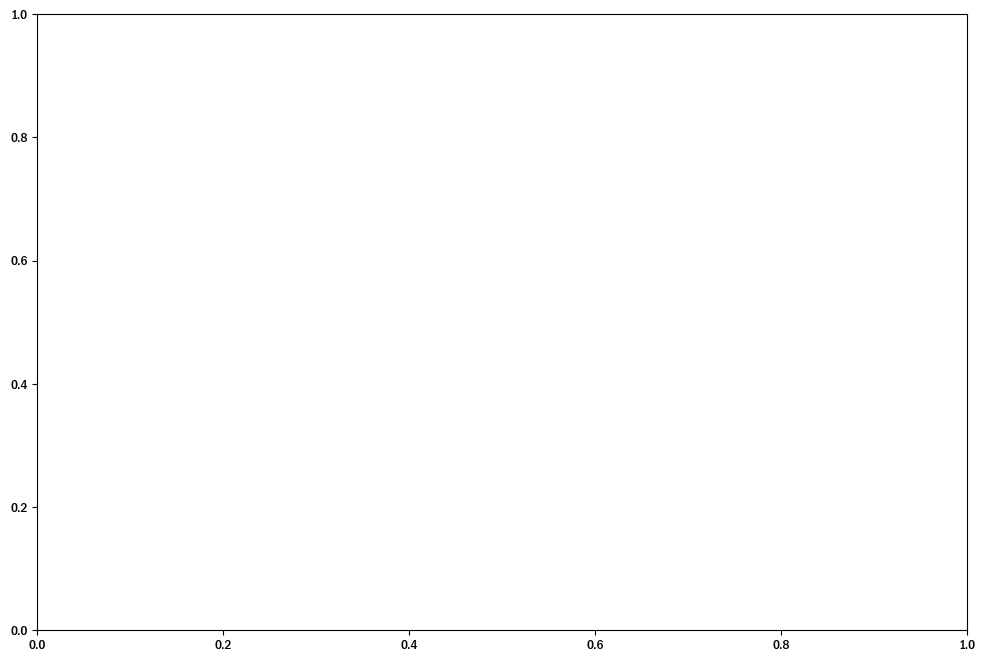

Available animation writers: ['pillow', 'ffmpeg', 'ffmpeg_file', 'html']
Saving animation...
Animation saved successfully!


In [33]:
def update(frame):
    ax.clear()
    df_fil = df_understat
    # Calculate which minute we're showing and how far along the growth we are
    current_minute = int(frame) + 1
    growth_fraction = frame - int(frame)  # Decimal part represents growth progress
    
    
    # Count shots per minute for all data
    shot_counts = df_fil.groupby('minute').size()
    minutes = list(range(0, int(max_minute) + 1))
    
    # Create arrays for the current state of the animation
    current_counts = []
    for minute in minutes:
        if minute < current_minute:
            # Previous minutes are fully grown
            count = shot_counts.get(minute, 0)
        elif minute == current_minute:
            # Current minute is growing
            count = shot_counts.get(minute, 0) * growth_fraction
        else:
            # Future minutes are not shown yet
            count = 0
        current_counts.append(count)



    #if minute == last_frame:
     #   current_display_minute = max_minute  # Show the final minute when at last frame
    #else:

    
    # Calculate total shots, ensuring all shots are counted at the last frame
        if minute == int(max_minute) + 1:
            total_shots = sum(shot_counts.get(min, 0) for min in range(0, max_minute + 1))
        else:
            total_shots = sum(shot_counts.get(min, 0) for min in range(0, current_minute))
            if growth_fraction > 0:
                total_shots += shot_counts.get(current_minute, 0) * growth_fraction
    
    # Create stem plot with magenta lines and orange dots
    markerline, stemlines, baseline = ax.stem(minutes, current_counts, linefmt='m-', markerfmt='o', basefmt='k-')
    plt.setp(markerline, markersize=8, color='orange')  # Orange dots
    plt.setp(stemlines, linewidth=2, color='magenta')   # Magenta lines
    
    # Set axis limits and labels
    ax.set_xlim(0, max_minute + 1)
    ax.set_ylim(0, shot_counts.max() + 1)
    ax.set_xlabel('Minutes', weight='bold', size=12)
    ax.set_ylabel('Number of Shots', weight='bold', size=12)


    # Add title and information
    current_display_minute = current_minute if growth_fraction == 0 else f"{current_minute-1}→{current_minute}"
    #   return current_display_minute
    ax.set_title(f'{club} Shot Count per Minute (Minute: {current_display_minute})', weight='bold', size=15)
    
 #   total_shots = sum(shot_counts.get(min, 0) for min in range(0, current_minute))
  #  if growth_fraction > 0:
   #     total_shots += shot_counts.get(current_minute, 0) * growth_fraction
    ax.text(max_minute * 0.7, ax.get_ylim()[1] * 0.9, f'Total Shots: {int(total_shots)}', weight='bold', size=15)
    ax.text(max_minute * 0.7, ax.get_ylim()[1] * 0.1, 'Copyright: Enrique Adolfo López Magallón\nData: Understat.com.')
    
    # Ensure proper layout
    fig.tight_layout()
    
    # Force drawing update
    fig.canvas.draw()
    
    return fig, ax

max_minute = df_fil['minute'].max()
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create animation with frames for growing each minute

# Create 10 frames for each minute's growth
frames_per_minute = 10
all_frames = np.linspace(0, max_minute, int(max_minute) * frames_per_minute)

fps = 20  # Based on your writer fps setting
freeze_frames = int(7 * fps)  # 7 seconds worth of frames
last_frame = int(max_minute)  # The last frame value
freeze_extension = [last_frame] * freeze_frames
all_frames = np.append(all_frames, freeze_extension)

            
print(f"Creating animation with {len(all_frames)} frames")

ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=all_frames,
    interval=50,  # Faster animation (50ms per frame)
    blit=False,
    repeat=False
)

# Show the animation
plt.show()

# The beginning part of your code remains the same

# Save the animation
available_writers = animation.writers.list()
print(f"Available animation writers: {available_writers}")

if 'ffmpeg' in available_writers:
    # Configure FFmpeg with more compatible settings
    ffmpeg_writer = animation.FFMpegWriter(  # Make sure to use animation.FFMpegWriter
        fps=20,  # Frames per second
        metadata=dict(artist='Enrique Adolfo Lopez Magallon'),
        bitrate=5000,  # Higher bitrate for better quality
        # More compatible encoding options
        codec='h264',  # Standard H.264 encoder instead of hardware-specific one
        extra_args=[
            '-preset', 'medium',  # Balanced preset
            '-crf', '23',  # Reasonable quality (lower = better quality)
            '-pix_fmt', 'yuv420p'  # Pixel format for better compatibility
            # Removed hardware acceleration options that were causing issues
        ]
    )

    # Save the animation with standard settings
    print("Saving animation...")
    ani.save(f'{club}_shots_animation_cuda.mp4', writer=ffmpeg_writer, dpi=300)
    print("Animation saved successfully!")
elif 'pillow' in available_writers:
    writer = animation.PillowWriter(fps=20)
    ani.save(f'{club}_shot_counts_stem_animation.gif', writer=writer, dpi=150)
else:
    print("No suitable writer found.")